In [61]:
data_path = '../../data'

In [62]:
from collections import defaultdict
import json
import os

repo_to_events = defaultdict(list)
for file in os.listdir(data_path):
    file_path = os.path.join(data_path, file)
    if os.path.isfile(file_path):
        with open(file_path, "r") as f:
            for line in f:
                data = json.loads(line)
                repo_to_events[file].append(data)

In [63]:
print(len(repo_to_events))

4343


In [64]:
repo = list(repo_to_events.keys())[0]
print(repo)

rollup__plugins.jsonl


In [65]:
print("Issue content example:")
for event in repo_to_events[repo]:
    event_type = event['html_url'].split('/')[-2]
    if event_type == 'issues':
        print(json.dumps(event, indent=4))
        break

Issue content example:
{
    "url": "https://api.github.com/repos/rollup/plugins/issues/1535",
    "repository_url": "https://api.github.com/repos/rollup/plugins",
    "labels_url": "https://api.github.com/repos/rollup/plugins/issues/1535/labels{/name}",
    "comments_url": "https://api.github.com/repos/rollup/plugins/issues/1535/comments",
    "events_url": "https://api.github.com/repos/rollup/plugins/issues/1535/events",
    "html_url": "https://github.com/rollup/plugins/issues/1535",
    "id": 1797991241,
    "node_id": "I_kwDODCLPqc5rKytJ",
    "number": 1535,
    "title": "allowImportingTsExtensions warning",
    "user": {
        "login": "dinghui-wang",
        "id": 61412262,
        "node_id": "MDQ6VXNlcjYxNDEyMjYy",
        "avatar_url": "https://avatars.githubusercontent.com/u/61412262?v=4",
        "gravatar_id": "",
        "url": "https://api.github.com/users/dinghui-wang",
        "html_url": "https://github.com/dinghui-wang",
        "followers_url": "https://api.github

In [66]:
print("Pull request content example:")
for event in repo_to_events[repo]:
    event_type = event['html_url'].split('/')[-2]
    if event_type == 'pull':
        print(json.dumps(event, indent=4))
        break

Pull request content example:
{
    "url": "https://api.github.com/repos/rollup/plugins/issues/1537",
    "repository_url": "https://api.github.com/repos/rollup/plugins",
    "labels_url": "https://api.github.com/repos/rollup/plugins/issues/1537/labels{/name}",
    "comments_url": "https://api.github.com/repos/rollup/plugins/issues/1537/comments",
    "events_url": "https://api.github.com/repos/rollup/plugins/issues/1537/events",
    "html_url": "https://github.com/rollup/plugins/pull/1537",
    "id": 1802117165,
    "node_id": "PR_kwDODCLPqc5VX0iY",
    "number": 1537,
    "title": "fix(commonjs): preserve this reference in the child class",
    "user": {
        "login": "TrickyPi",
        "id": 33021497,
        "node_id": "MDQ6VXNlcjMzMDIxNDk3",
        "avatar_url": "https://avatars.githubusercontent.com/u/33021497?v=4",
        "gravatar_id": "",
        "url": "https://api.github.com/users/TrickyPi",
        "html_url": "https://github.com/TrickyPi",
        "followers_url": "h

In [67]:
repo_to_events_count = defaultdict(dict)
for repo, events in repo_to_events.items():
    events_count = {
        'issues': 0,
        'pull': 0,
    }
    for event in events:
        event_type = event['html_url'].split('/')[-2]
        events_count[event_type] += 1

    repo_to_events_count[repo] = events_count

In [68]:
print(len(repo_to_events_count))

4343


In [69]:
import pandas as pd
df = pd.DataFrame.from_dict(repo_to_events_count)

In [70]:
dft = df.transpose()
dft.columns

Index(['issues', 'pull'], dtype='object')

(0.0, 10000.0)

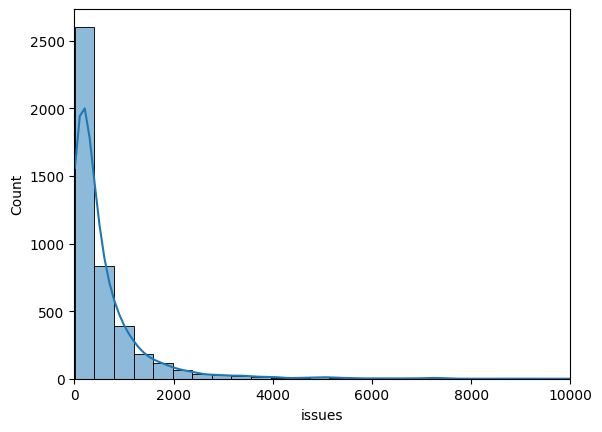

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=dft, x='issues', kde=True, bins=50)
plt.xlim(0, 10000)